Sentiment Analysis

Data can be downloaded from:

https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment


In [2]:
import tweepy as tw 

import tensorflow as tf

import numpy as np 
import pandas as pd 
import os

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"
import warnings
warnings.filterwarnings('ignore')

In [3]:
tweets = pd.read_csv("Tweets.csv")
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [52]:
tweets.shape

(14640, 2)

In [4]:
#no missing values 
tweets.isna().sum()

airline_sentiment    0
text                 0
dtype: int64

These tweets are already hand-tagged with sentiment: positive, neutral, negative (1 of 3 categories)

Then I build a model to correctly predict the hand-tagged sentiment.

What is the accuracy? Print a heatmap to see where the model performs well and where not.

In [5]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [8]:
As the figure below shows, majority of the comments are quite negative:

SyntaxError: invalid syntax (3294922989.py, line 1)

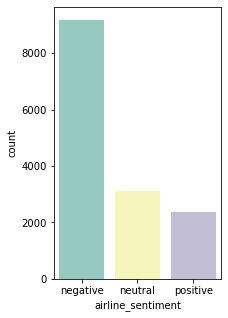

In [6]:
#plotting the sentiment categories 
plt.figure(figsize=(3,5))
sns.countplot(tweets['airline_sentiment'], order =tweets.airline_sentiment.value_counts().index,palette="Set3")
plt.show()

In [ ]:
Calculating the % of positive, neutral and negative comments:

In [7]:
tweets['airline_sentiment'].value_counts() / len(tweets)


negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

In [ ]:
As we can see, 62% of the comments are negative and 21% neutral, and only 16% of the commnets are positive. 

Being aware of this general tendency, in my previous post I scraped the web only for positive comments :-)